<a href="https://colab.research.google.com/github/Khushgod/BA_Reviews/blob/main/British_Airways_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [8]:
df.to_csv('reviews.csv', encoding ='utf-8')
df

,reviews
0,✅ Trip Verified | We are extremely grateful ...
1,✅ Trip Verified | I had an appalling experie...
2,"Not Verified | Good points, the cabin crew, t..."
3,"Not Verified | It was a decent flight, reason..."
4,✅ Trip Verified | I really like flying Briti...
...,...
995,✅ Trip Verified | Having booked this flight a ...
996,✅ Trip Verified | I wouldn't even rate them 1...
997,✅ Trip Verified | Flying London City to Geneva...
998,✅ Trip Verified | Los Angeles to Istanbul via...


In [21]:
#!pip install --upgrade --no-cache-dir --force-reinstall numpy gensim pyldavis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 174.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 130.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 130.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 262.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 273.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 294.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 311.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 216.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 272.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 296.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 253.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [12]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# Dictionary of required packages
required_packages = {
    'pandas': 'pandas',
    'numpy': 'numpy',
    'matplotlib': 'matplotlib',
    'seaborn': 'seaborn',
    're': None,  # built-in
    'nltk': 'nltk',
    'wordcloud': 'wordcloud',
    'sklearn': 'scikit-learn',
    'gensim': 'gensim',
    'pyLDAvis': 'pyldavis',
    'textblob': 'textblob'
}

# Check for missing packages and install if necessary
missing_packages = []

for package, pip_name in required_packages.items():
    if pip_name:  # Skip built-in modules
        try:
            __import__(package)
        except ImportError:
            missing_packages.append(pip_name)

if missing_packages:
    print("Missing required packages. Please install them using pip:")
    print(f"pip install {' '.join(missing_packages)}")
    print("\nOr run the following to install all required packages:")
    print("pip install pandas numpy matplotlib seaborn nltk wordcloud scikit-learn gensim pyldavis textblob")
    sys.exit(1)

# Import required packages after check
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob

# Try to import gensim-related modules
try:
    import gensim
    from gensim import corpora
    from gensim.models import CoherenceModel
    import pyLDAvis
    import pyLDAvis.gensim_models
    GENSIM_AVAILABLE = True
except ImportError:
    print("Warning: gensim and/or pyLDAvis not available. Topic modeling features will be limited.")
    GENSIM_AVAILABLE = False

# Download necessary NLTK data
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('vader_lexicon', quiet=True)

True

In [29]:
# STEP 2: DATA PREPROCESSING
df_read = pd.read_csv('reviews.csv')

'''for line in df_read['reviews']:
    parts = line.strip().split('|')
    verify = parts[0].strip()
    df['verified']= verify
    text = parts[1].strip()
'''

def extract_verification_and_text(review_line):
    parts = str(review_line).strip().split('|', 1) # Split only on the first '|'
    if len(parts) == 2:
        verify_status = parts[0].strip().lower() == 'verified' # Convert to boolean
        text = parts[1].strip()
    else:
        # Handle cases where the format might not be as expected
        verify_status = False # Assume not verified if format is off
        text = str(review_line).strip() # Use the whole line as text

    return verify_status, text

# Apply the extraction function to create new columns
df['verified'], df['review_text_only'] = zip(*df['reviews'].apply(extract_verification_and_text))

# Clean text function
def clean_text(text):
    # Convert to lowercase
    text = str(text).lower()

    # Remove special characters and emojis
    text = re.sub(r'[^\w\s.]', ' ', text)

    # Replace unicode characters
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text


df['clean_review'] = df['reviews'].apply(clean_text)

# Tokenize, remove stopwords, and lemmatize
def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    custom_stopwords = {'british', 'airways', 'ba', 'flight', 'airline', 'plane', 'aircraft', 'fly', 'flying'}
    stop_words.update(custom_stopwords)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens


df['tokens'] = df['clean_review'].apply(preprocess_text)

df['processed_text'] = df['tokens'].apply(lambda x: ' '.join(x))


print(df['processed_text'])

0      trip verified extremely grateful crew ba0058 c...
1      trip verified appalling experience started tri...
2      verified good point cabin crew helpful profess...
3      verified decent reasonable comfortable seat pi...
4      trip verified really like particularly new clu...
                             ...                        
995    trip verified booked week strike mistakingly t...
996    trip verified even rate business class passeng...
997    trip verified london city geneva plus embraer ...
998    trip verified los angeles istanbul via london ...
999    trip verified phoenix tel aviv via london retu...
Name: processed_text, Length: 1000, dtype: object


In [27]:
# STEP 3: SENTIMENT ANALYSIS
# --------------------------
print("\n\nStep 3: Sentiment Analysis")
print("-----------------------")

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Get sentiment scores
df['sentiment_scores'] = df['clean_review'].apply(lambda x: sia.polarity_scores(x))
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])
df['positive_score'] = df['sentiment_scores'].apply(lambda x: x['pos'])
df['neutral_score'] = df['sentiment_scores'].apply(lambda x: x['neu'])
df['negative_score'] = df['sentiment_scores'].apply(lambda x: x['neg'])

# Categorize sentiment
df['sentiment'] = df['compound_score'].apply(
    lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

# Add TextBlob sentiment for comparison
df['textblob_polarity'] = df['clean_review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['textblob_subjectivity'] = df['clean_review'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

print("\nSentiment analysis results:")
print(df[['sentiment', 'compound_score', 'textblob_polarity']].head())

# Create output directory for images
os.makedirs('output', exist_ok=True)

# Visualize sentiment distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sentiment_counts = df['sentiment'].value_counts()
colors = {'positive': 'green', 'neutral': 'gray', 'negative': 'red'}
plt.bar(sentiment_counts.index, sentiment_counts.values, color=[colors.get(x, 'blue') for x in sentiment_counts.index])
plt.title('Sentiment Distribution')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(df['compound_score'], bins=10, color='skyblue', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('output/sentiment_distribution.png')
plt.close()

# Compare sentiment by verification status
if len(df['verified'].unique()) > 1:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='verified', y='compound_score', data=df)
    plt.title('Sentiment by Verification Status')
    plt.xlabel('Verified Review')
    plt.ylabel('Sentiment Score')
    plt.grid(axis='y', alpha=0.3)
    plt.savefig('output/sentiment_by_verification.png')
    plt.close()

print("\nSentiment visualizations saved in the 'output' directory")



Step 3: Sentiment Analysis
-----------------------

Sentiment analysis results:
  sentiment  compound_score  textblob_polarity
0  positive          0.8016           0.058750
1  negative         -0.9924          -0.054216
2  negative         -0.1707           0.048286
3  positive          0.4054           0.143864
4  positive          0.9652           0.248872

Sentiment visualizations saved in the 'output' directory


In [30]:
# STEP 4: TOPIC MODELING
# ----------------------
print("\n\nStep 4: Topic Modeling")
print("------------------")

# Check if gensim is available for topic modeling
if not GENSIM_AVAILABLE:
    print("Skipping topic modeling due to missing gensim library.")
    print("To enable topic modeling, please install gensim and pyLDAvis:")
    print("pip install gensim pyldavis")

    # Create placeholder columns for compatibility with the rest of the code
    df['dominant_topic'] = 0
    df['topic_contribution'] = 1.0
    df['keywords'] = "Topic modeling unavailable"

    # Create a simple alternative topic analysis using sklearn's LatentDirichletAllocation
    try:
        print("\nUsing sklearn for basic topic modeling instead...")

        # Convert text data to document-term matrix
        vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
        dtm = vectorizer.fit_transform(df['processed_text'])

        # Default to 3 topics or fewer for small datasets
        optimal_topics = min(3, max(2, len(df) // 2))

        # Create and fit LDA model
        lda = LatentDirichletAllocation(n_components=optimal_topics, random_state=42)
        lda.fit(dtm)

        # Print top words for each topic
        feature_names = vectorizer.get_feature_names_out()
        print("\nTop words in each topic (using sklearn):")
        for topic_idx, topic in enumerate(lda.components_):
            top_words_idx = topic.argsort()[:-11:-1]
            top_words = [feature_names[i] for i in top_words_idx]
            print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

        # Add basic topic information to dataframe
        topic_results = lda.transform(dtm)
        df['sklearn_topic'] = topic_results.argmax(axis=1)

        # Create a simple visualization of topic distribution
        plt.figure(figsize=(10, 6))
        topic_counts = df['sklearn_topic'].value_counts().sort_index()
        plt.bar(topic_counts.index, topic_counts.values, color='skyblue', edgecolor='black')
        plt.title('Distribution of Topics (sklearn LDA)')
        plt.xlabel('Topic')
        plt.ylabel('Count')
        plt.xticks(range(optimal_topics))
        plt.grid(axis='y', alpha=0.3)
        plt.savefig('output/basic_topic_distribution.png')
        plt.close()

        print("\nBasic topic modeling visualization saved as 'basic_topic_distribution.png'")

    except Exception as e:
        print(f"Warning: Could not perform alternative topic modeling: {e}")
else:
    # Full gensim topic modeling implementation
    # Create dictionary and corpus for topic modeling
    dictionary = corpora.Dictionary(df['tokens'])
    corpus = [dictionary.doc2bow(text) for text in df['tokens']]

    # Function to compute coherence for different numbers of topics
    def compute_coherence_values(dictionary, corpus, texts, start=2, limit=10, step=1):
        coherence_values = []
        model_list = []
        for num_topics in range(start, limit, step):
            model = gensim.models.LdaModel(
                corpus=corpus,
                id2word=dictionary,
                num_topics=num_topics,
                random_state=42,
                passes=10,
                alpha='auto',
                per_word_topics=True
            )
            model_list.append(model)
            coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_values.append(coherencemodel.get_coherence())

        return model_list, coherence_values

    # Adjust topic range based on dataset size
    min_topics = 2
    max_topics = min(11, len(df) + 1)  # Limit max topics based on dataset size
    step = 1

    if len(df) < 10:
        max_topics = min(6, len(df) + 1)

    # Compute coherence values for topic range
    try:
        model_list, coherence_values = compute_coherence_values(
            dictionary=dictionary,
            corpus=corpus,
            texts=df['tokens'].tolist(),
            start=min_topics,
            limit=max_topics,
            step=step
        )

        # Plot coherence scores
        plt.figure(figsize=(10, 6))
        plt.plot(range(min_topics, max_topics, step), coherence_values, marker='o')
        plt.xlabel("Number of Topics")
        plt.ylabel("Coherence Score")
        plt.title("Topic Coherence by Number of Topics")
        plt.grid(True, alpha=0.3)
        plt.savefig('output/topic_coherence.png')
        plt.close()

        # Select optimal number of topics - default or based on coherence
        if coherence_values:
            # Find the index of the maximum coherence value
            optimal_topics = min_topics + coherence_values.index(max(coherence_values)) * step
        else:
            # Default to 3 topics if coherence computation fails
            optimal_topics = 3
    except Exception as e:
        print(f"Warning: Error during coherence computation: {e}")
        print("Defaulting to basic topic configuration...")
        optimal_topics = min(3, max(2, len(df) // 2))

    # Ensure optimal_topics is not too large for small datasets
    if optimal_topics > len(df) / 2:
        optimal_topics = max(2, int(len(df) / 2))

    print(f"\nSelected optimal number of topics: {optimal_topics}")

    # Train LDA model with optimal number of topics
    try:
        lda_model = gensim.models.LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=optimal_topics,
            random_state=42,
            passes=10,
            alpha='auto'
        )

        # Print topics
        print("\nTop words in each topic:")
        for idx, topic in lda_model.print_topics():
            print(f"Topic {idx + 1}: {topic}")

        # Get topic distribution for each document
        def format_topics_sentences(ldamodel, corpus):
            sent_topics_df = pd.DataFrame()

            # Get main topic in each document
            for i, row_list in enumerate(ldamodel[corpus]):
                row = sorted(row_list, key=lambda x: x[1], reverse=True)

                # Get the dominant topic, percentage contribution and keywords for each document
                for j, (topic_num, prop_topic) in enumerate(row):
                    if j == 0:  # => dominant topic
                        wp = ldamodel.show_topic(topic_num)
                        topic_keywords = ", ".join([word for word, prop in wp])
                        sent_topics_df = pd.concat([
                            sent_topics_df,
                            pd.DataFrame([[int(topic_num), round(prop_topic, 4), topic_keywords]],
                                        columns=['dominant_topic', 'topic_contribution', 'keywords'])
                        ], ignore_index=True)
                    else:
                        break
            return sent_topics_df

        # Assign topics to reviews
        topic_distribution = format_topics_sentences(lda_model, corpus)
        df = pd.concat([df.reset_index(drop=True), topic_distribution.reset_index(drop=True)], axis=1)

        # Visualize topic distribution
        plt.figure(figsize=(10, 6))
        topic_counts = df['dominant_topic'].value_counts().sort_index()
        plt.bar(topic_counts.index, topic_counts.values, color='skyblue', edgecolor='black')
        plt.title('Distribution of Dominant Topics')
        plt.xlabel('Topic')
        plt.ylabel('Count')
        plt.xticks(range(optimal_topics))
        plt.grid(axis='y', alpha=0.3)
        plt.savefig('output/topic_distribution.png')
        plt.close()

        # Create a combined topic-sentiment visualization
        plt.figure(figsize=(12, 6))
        try:
            pivot = pd.crosstab(df['dominant_topic'], df['sentiment'])
            pivot.plot(kind='bar', stacked=True, colormap='viridis')
            plt.title('Sentiment Distribution by Topic')
            plt.xlabel('Topic')
            plt.ylabel('Count')
            plt.legend(title='Sentiment')
            plt.grid(axis='y', alpha=0.3)
            plt.savefig('output/sentiment_by_topic.png')
        except Exception as e:
            print(f"Warning: Could not create sentiment by topic visualization: {e}")
        plt.close()

        print("\nTopic modeling visualizations saved in the 'output' directory")

    except Exception as e:
        print(f"Error during topic modeling: {e}")
        print("Creating placeholder topic data for compatibility...")
        df['dominant_topic'] = 0
        df['topic_contribution'] = 1.0
        df['keywords'] = "Topic modeling failed"



Step 4: Topic Modeling
------------------

Selected optimal number of topics: 2

Top words in each topic:
Topic 1: 0.011*"verified" + 0.011*"hour" + 0.010*"trip" + 0.009*"service" + 0.009*"customer" + 0.007*"time" + 0.007*"day" + 0.007*"london" + 0.007*"told" + 0.007*"get"
Topic 2: 0.016*"seat" + 0.013*"verified" + 0.012*"trip" + 0.010*"service" + 0.010*"crew" + 0.009*"time" + 0.009*"good" + 0.009*"food" + 0.009*"class" + 0.008*"cabin"

Topic modeling visualizations saved in the 'output' directory


<Figure size 1200x600 with 0 Axes>

In [31]:
# STEP 5: WORDCLOUD GENERATION
# ---------------------------
print("\n\nStep 5: Word Cloud Analysis")
print("-----------------------")

# Create a function to generate word clouds
def generate_wordcloud(text, title, filename):
    if not text.strip():  # Check if text is empty
        print(f"Warning: No text available for {title}")
        return

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        max_words=100,
        contour_width=3,
        contour_color='steelblue',
        stopwords=STOPWORDS,
        random_state=42
    ).generate(text)

    plt.figure(figsize=(16, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.tight_layout(pad=0)
    plt.savefig(filename)
    plt.close()

# Generate overall word cloud
all_text = ' '.join(df['processed_text'])
generate_wordcloud(all_text, 'Word Cloud of All British Airways Reviews', 'output/overall_wordcloud.png')

# Generate sentiment-based word clouds
for sentiment in df['sentiment'].unique():
    text = ' '.join(df[df['sentiment'] == sentiment]['processed_text'])
    generate_wordcloud(
        text,
        f'Word Cloud of {sentiment.capitalize()} Reviews',
        f'output/{sentiment}_wordcloud.png'
    )

# Generate topic-based word clouds
for topic_idx in range(optimal_topics):
    text = ' '.join(df[df['dominant_topic'] == topic_idx]['processed_text'])
    generate_wordcloud(
        text,
        f'Word Cloud of Topic {topic_idx + 1}',
        f'output/topic_{topic_idx+1}_wordcloud.png'
    )

print("\nWord cloud visualizations saved in the 'output' directory")



Step 5: Word Cloud Analysis
-----------------------

Word cloud visualizations saved in the 'output' directory




Step 6: Aspect-Based Sentiment Analysis
----------------------------------

Aspect-based sentiment analysis:
           Aspect  Mentions  Average Score  Positive  Neutral  Negative
0            crew       452       0.279125       278       75        99
1            seat       758       0.033076       281      214       263
2            food       419       0.152940       207       84       128
3         service       744       0.038955       307      144       293
4          lounge       202       0.168556       106       41        55
5         comfort       199       0.298424       134        6        59
6            wifi        37      -0.114095         6        8        23
7           staff       388       0.067232       177       54       157
8           delay       301      -0.241954        57       17       227
9   entertainment        89       0.372938        69        0        20
10          cabin       360       0.216478       200       74        86
11          price        

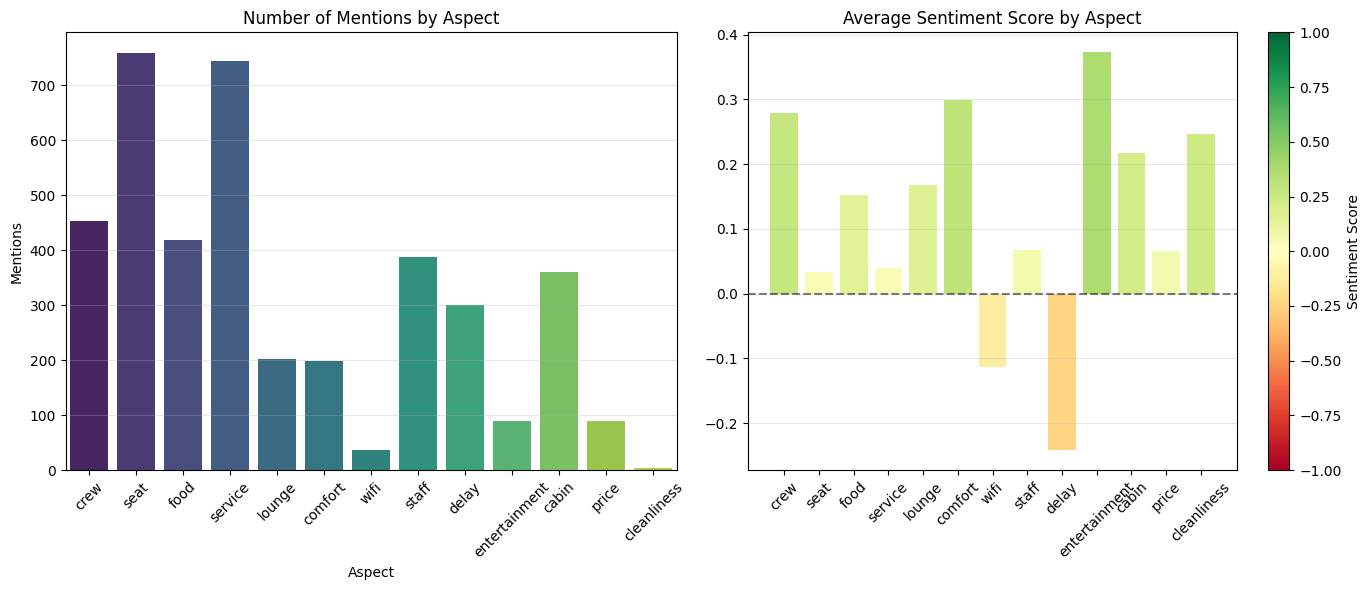

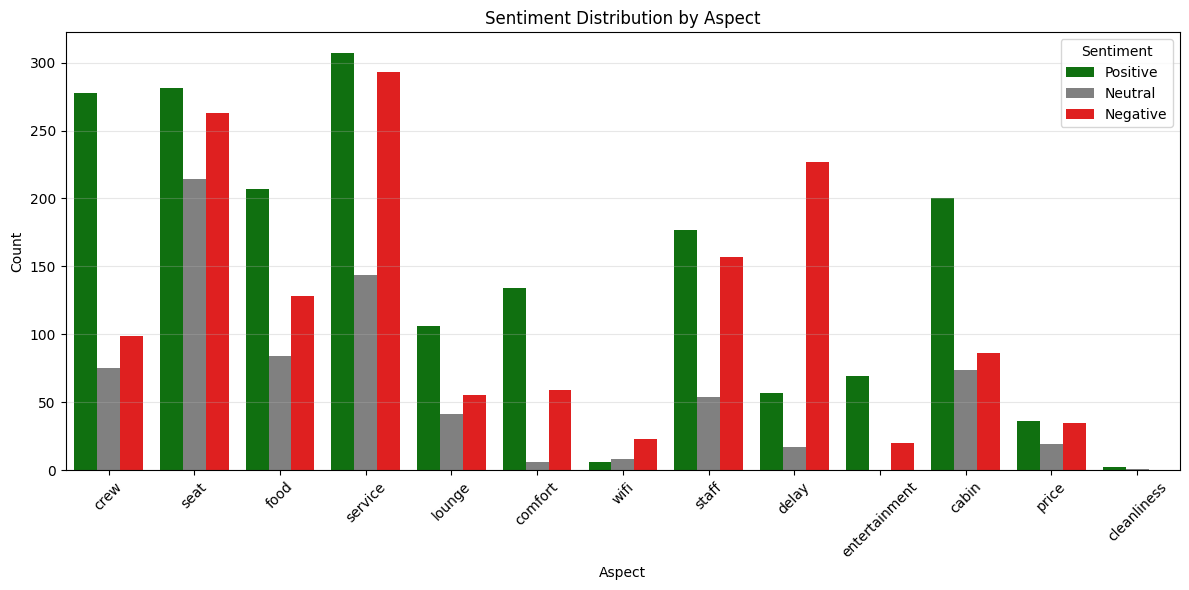


Aspect-based visualizations saved in the 'output' directory


In [47]:
# STEP 6: ASPECT-BASED SENTIMENT ANALYSIS
# --------------------------------------
print("\n\nStep 6: Aspect-Based Sentiment Analysis")
print("----------------------------------")

# Define key aspects to analyze
aspects = ['crew', 'seat', 'food', 'service', 'lounge', 'comfort', 'wifi', 'staff',
           'delay', 'entertainment', 'cabin', 'price', 'check-in', 'cleanliness']

# Function to analyze sentiment for specific aspects
def aspect_sentiment(reviews, aspects):
    results = {}

    for aspect in aspects:
        mentions = []
        scores = []

        for review in reviews:
            # Ensure the review is treated as a string
            sentences = sent_tokenize(str(review).lower())
            for sentence in sentences:
                if aspect in sentence:
                    mentions.append(sentence)
                    scores.append(sia.polarity_scores(sentence)['compound'])

        if scores:
            results[aspect] = {
                'mentions': len(scores),
                'avg_score': sum(scores) / len(scores) if scores else 0,
                'positive': sum(1 for score in scores if score >= 0.05),
                'neutral': sum(1 for score in scores if -0.05 < score < 0.05),
                'negative': sum(1 for score in scores if score <= -0.05),
                'example': mentions[0] if mentions else ""
            }

    return results

# Analyze aspects
# Corrected the column name from 'cleaned_text' to 'clean_review'
aspect_results = aspect_sentiment(df['clean_review'], aspects)

# Filter aspects with at least one mention
filtered_aspects = {k: v for k, v in aspect_results.items() if v['mentions'] > 0}

if filtered_aspects:
    # Create a DataFrame for visualization
    aspect_df = pd.DataFrame({
        'Aspect': list(filtered_aspects.keys()),
        'Mentions': [data['mentions'] for data in filtered_aspects.values()],
        'Average Score': [data['avg_score'] for data in filtered_aspects.values()],
        'Positive': [data['positive'] for data in filtered_aspects.values()],
        'Neutral': [data['neutral'] for data in filtered_aspects.values()],
        'Negative': [data['negative'] for data in filtered_aspects.values()]
    })

    print("\nAspect-based sentiment analysis:")
    print(aspect_df)

    # Visualize aspect mentions and sentiment
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6)) # Create subplots and get axes objects

    # Plotting on the first axis (ax1)
    sns.barplot(x='Aspect', y='Mentions', data=aspect_df, palette='viridis', ax=ax1)
    ax1.set_title('Number of Mentions by Aspect')
    ax1.tick_params(axis='x', rotation=45) # Rotate x-ticks using ax1
    ax1.grid(axis='y', alpha=0.3)

    # Use a diverging colormap for sentiment scores
    norm = plt.Normalize(-1, 1)
    sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlGn, norm=norm)
    sm.set_array([])

    colors = plt.cm.RdYlGn(norm(aspect_df['Average Score'].values))

    # Plotting on the second axis (ax2)
    ax2.bar(aspect_df['Aspect'], aspect_df['Average Score'], color=colors) # Use ax2 to plot

    # Corrected line to add color bar using ax2
    plt.colorbar(sm, ax=ax2, label='Sentiment Score')

    ax2.set_title('Average Sentiment Score by Aspect') # Use ax2 to set title
    ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5) # Use ax2 to draw horizontal line
    ax2.set_xticks(aspect_df['Aspect']) # Set x-ticks explicitly using ax2
    ax2.set_xticklabels(aspect_df['Aspect'], rotation=45) # Use ax2 to rotate x-tick labels
    ax2.grid(axis='y', alpha=0.3) # Use ax2 to set grid

    plt.tight_layout()
    plt.savefig('output/aspect_analysis.png')
    plt.show()
    plt.close()

    # Create a stacked bar chart of positive/neutral/negative mentions
    aspect_df_melted = pd.melt(
        aspect_df,
        id_vars=['Aspect'],
        value_vars=['Positive', 'Neutral', 'Negative'],
        var_name='Sentiment',
        value_name='Count'
    )

    plt.figure(figsize=(12, 6))
    sns.barplot(
        x='Aspect',
        y='Count',
        hue='Sentiment',
        data=aspect_df_melted,
        palette={'Positive': 'green', 'Neutral': 'gray', 'Negative': 'red'}
    )
    plt.title('Sentiment Distribution by Aspect')
    plt.xticks(rotation=45)
    plt.legend(title='Sentiment')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('output/aspect_sentiment_distribution.png')
    plt.show()
    plt.close()

    print("\nAspect-based visualizations saved in the 'output' directory")
else:
    print("\nNo aspects found with mentions in the dataset")



Step 7: Summary Dashboard
---------------------


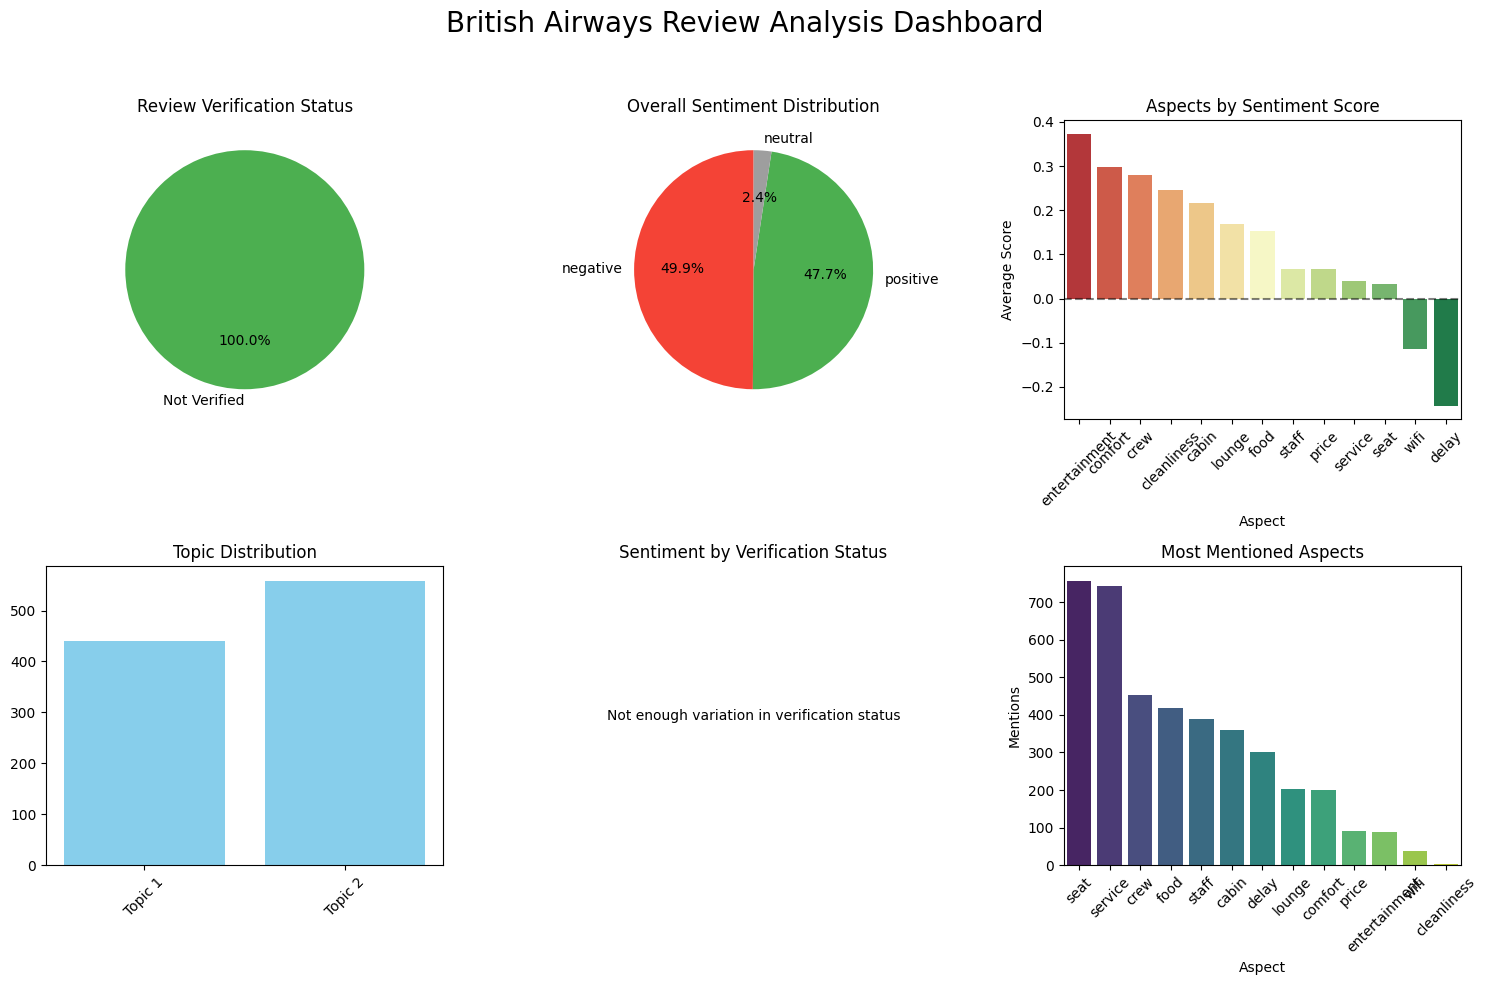


Summary dashboard saved in the 'output' directory


In [48]:
# STEP 7: SUMMARY AND DASHBOARD
# ----------------------------
print("\n\nStep 7: Summary Dashboard")
print("---------------------")

# Create summary metrics
summary = {
    'total_reviews': len(df),
    'verified_reviews': sum(df['verified']),
    'avg_sentiment': df['compound_score'].mean(),
    'positive_reviews': sum(df['sentiment'] == 'positive'),
    'negative_reviews': sum(df['sentiment'] == 'negative'),
    'neutral_reviews': sum(df['sentiment'] == 'neutral'),
}

# Add top positive/negative aspects if available
if 'aspect_df' in locals() and not aspect_df.empty:
    summary['top_positive_aspects'] = aspect_df.sort_values('Average Score', ascending=False)['Aspect'].iloc[0]
    summary['top_negative_aspects'] = aspect_df.sort_values('Average Score')['Aspect'].iloc[0]
else:
    summary['top_positive_aspects'] = "N/A"
    summary['top_negative_aspects'] = "N/A"

# Create summary dashboard
plt.figure(figsize=(15, 10))

# Title
plt.suptitle('British Airways Review Analysis Dashboard', fontsize=20, y=0.98)

# Verification status
plt.subplot(2, 3, 1)
verification_counts = df['verified'].value_counts()
plt.pie(
    verification_counts,
    labels=['Verified' if idx else 'Not Verified' for idx in verification_counts.index],
    autopct='%1.1f%%',
    colors=['#4CAF50', '#FFC107'],
    startangle=90
)
plt.title('Review Verification Status')

# Sentiment distribution
plt.subplot(2, 3, 2)
sentiment_counts = df['sentiment'].value_counts()
colors_dict = {'positive': '#4CAF50', 'neutral': '#9E9E9E', 'negative': '#F44336'}
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    colors=[colors_dict.get(s, '#9E9E9E') for s in sentiment_counts.index],
    startangle=90
)
plt.title('Overall Sentiment Distribution')

# Top aspects by sentiment (if available)
plt.subplot(2, 3, 3)
if 'aspect_df' in locals() and not aspect_df.empty:
    top_aspects = aspect_df.sort_values('Average Score', ascending=False)
    sns.barplot(
        x='Aspect',
        y='Average Score',
        data=top_aspects,
        palette='RdYlGn'
    )
    plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    plt.title('Aspects by Sentiment Score')
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, 'No aspect data available', horizontalalignment='center', verticalalignment='center')
    plt.title('Aspects by Sentiment Score')
    plt.axis('off')

# Topic distribution
plt.subplot(2, 3, 4)
topic_counts = df['dominant_topic'].value_counts().sort_index()
plt.bar(
    [f"Topic {i+1}" for i in topic_counts.index],
    topic_counts.values,
    color='skyblue'
)
plt.title('Topic Distribution')
plt.xticks(rotation=45)

# Sentiment by verification
plt.subplot(2, 3, 5)
if len(df['verified'].unique()) > 1:
    sns.boxplot(
        x='verified',
        y='compound_score',
        data=df,
        palette=['#FFC107', '#4CAF50']
    )
    plt.title('Sentiment by Verification Status')
    plt.xlabel('Verified Review')
    plt.ylabel('Sentiment Score')
else:
    plt.text(0.5, 0.5, 'Not enough variation in verification status',
             horizontalalignment='center', verticalalignment='center')
    plt.title('Sentiment by Verification Status')
    plt.axis('off')

# Most mentioned aspects
plt.subplot(2, 3, 6)
if 'aspect_df' in locals() and not aspect_df.empty:
    aspect_df_sorted = aspect_df.sort_values('Mentions', ascending=False)
    sns.barplot(
        x='Aspect',
        y='Mentions',
        data=aspect_df_sorted,
        palette='viridis'
    )
    plt.title('Most Mentioned Aspects')
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, 'No aspect data available', horizontalalignment='center', verticalalignment='center')
    plt.title('Most Mentioned Aspects')
    plt.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('output/summary_dashboard.png')
plt.show()
plt.close()

print("\nSummary dashboard saved in the 'output' directory")

In [49]:
# STEP 8: EXPORT PROCESSED DATA
# ----------------------------
print("\n\nStep 8: Exporting Processed Data")
print("-----------------------------")

# Select columns to export
export_columns = [
    'verified', 'clean_review', 'cleaned_text', 'sentiment',
    'compound_score'
]

# Add topic columns if they exist
if 'dominant_topic' in df.columns:
    export_columns.extend(['dominant_topic', 'topic_contribution'])

# Add sklearn topic column if it exists
if 'sklearn_topic' in df.columns:
    export_columns.append('sklearn_topic')

# Export to CSV
df[export_columns].to_csv('output/processed_ba_reviews.csv')



Step 8: Exporting Processed Data
-----------------------------


In [ ]:
from google.colab import drive
drive.mount('/content/drive')